# Práctica 1: Introducción a Señales

In [1]:
# Imports

%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt
import math
import numpy as np

# Funciones auxiliares

def plot(t, x):
    plt.figure()
    plt.stem(t,x)
    plt.show()

## Ejercicio 1: Escriba funciones que permitan generar las siguientes señales discretas

Una senoidal que responda a la ecuación y[n] = sen(2πfst+φ), donde t es la variable de tiempo discreto, con paso 1/fm, fm ∈ R es la frecuencia de muestreo, fs ∈ R es la frecuencia de la senoidal y φ ∈ (−π, π) su fase

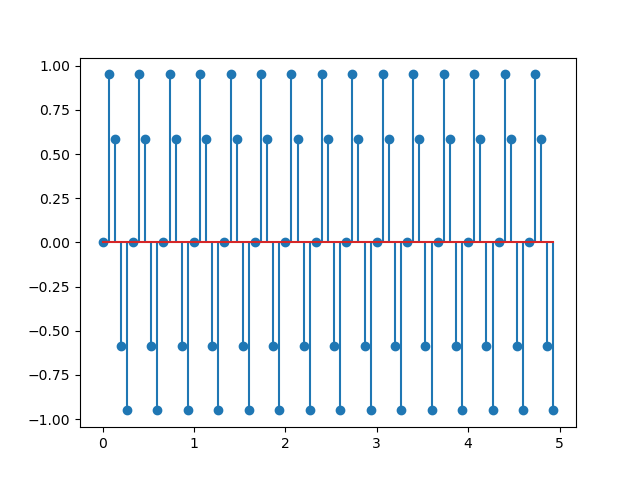

In [2]:
def senoidal(fm, fs, phi, tini, tfin): 
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    x = np.sin(2*math.pi*fs*t) + phi
    return x, t

x, t = senoidal (15, 3, 0, 0, 5)
plot(t,x)

Una señal sinc, definida como

$ sinc(t)= \left\{ \begin{array}{lcc}
             \frac{\sin(x)}{x} &   si  & x \not= 0 \\
             1 &   si  & x = 0 \\
             \end{array}
   \right.
$

considerando $ x = 2 \pi f_s t $ , con f_S ∈ R y t ∈ (−1, 1).

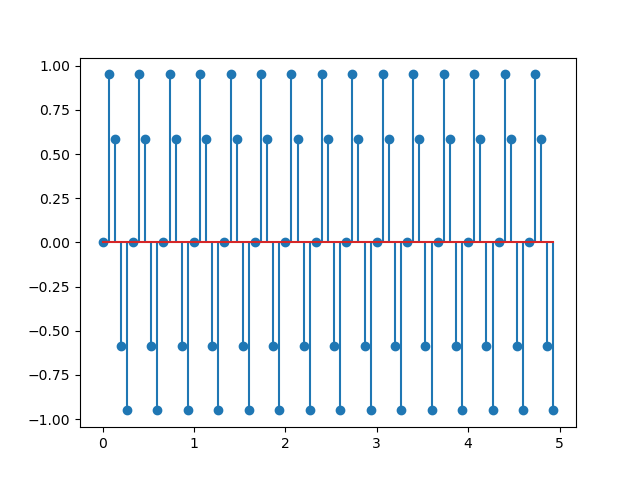

In [3]:
def sinc(fm, fs, phi, tini, tfin): 
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    x = 2*math.pi*fs*t+phi
    idx_noceros = np.where(np.logical_or(x>1e-5, x<-1e-5))
    y = np.ones(len(x))
    y[idx_noceros] = np.sin(x[idx_noceros]) / x[idx_noceros]
    return y, t

x_sinc, t_sinc = sinc(25, 3, 0, -1, 1)
plot(t,x)

Una onda cuadrada, que puede definirse de la siguiente manera:
$ c(t)= \left\{ \begin{array}{lcc}
             -1 &   si  & mod(2 \pi f_s t + \phi, 2 \pi) & x \geq \pi \\
             1 &   si  & mod(2 \pi f_s t + \phi, 2 \pi) & x < \pi \\
             \end{array}
   \right.
$

donde t es la variable de tiempo discreto desde 0 hasta 1 segundo, con paso $1/fm, fm \in \Re$ es la frecuencia de muestreo, $ f_s \in \Re$ es la frecuencia de la senoidal y $ \phi \in (-\pi, \pi) $ su fase.

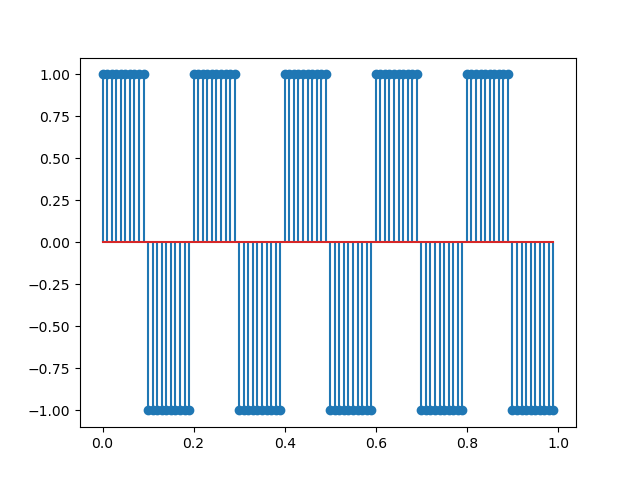

In [4]:
def cuadrada(fm, fs, phi, tini, tfin):
  Tm = 1/fm
  t = np.arange(tini, tfin, Tm)  
  cond = np.mod(2*math.pi*fs*t+phi, 2*math.pi)
  idx_noceros = np.where(cond>= math.pi)
  y = np.ones(len(t))
  y[idx_noceros] = -1
  return t, y

t, y = cuadrada(100, 5, 0, 0, 1)
plot(t, y)

Las tres funciones deben permitir elegir el intervalo de tiempo que se desea muestrear, definido desde $ t_{inicial} $ a $ t_{final} $. Una vez generadas estas funciones, pruebelas utilizando una frecuencia de muestreo de 100 Hz, un intervalo de
tiempo de [0; 1] y distintos valores para la $f_s$ y la fase $ \phi $. Respete la relación $ 2f_s \geq f_m$ para determinar los valores de las frecuencias.

## Ejercicio 2: Realice las siguientes operaciones básicas sobre una señal senoidal:

1. inversión (sobre t)

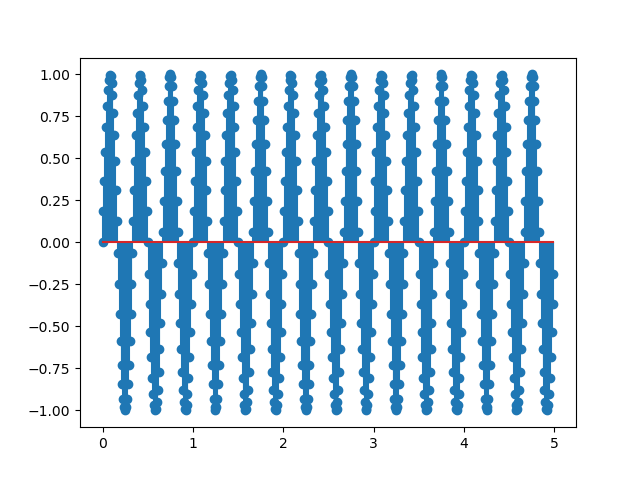

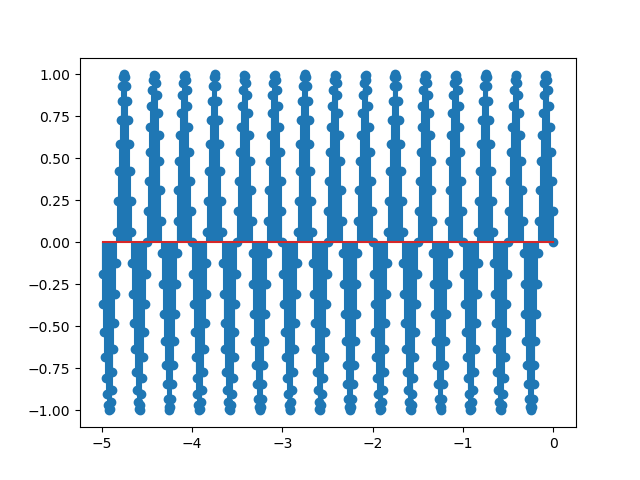

In [5]:
def inversion(y, t):
    t = -t
    return t, y

x, t = senoidal (100, 3, 0, 0, 5)
plot(t,x)

t_2, x_2 = inversion(x, t)
plot(t_2, x_2)

2. rectificación

De media onda: los valores negativos se vuelven 0

De onda completa: los valores negativos se vuelven el valor absoluto de ese valor

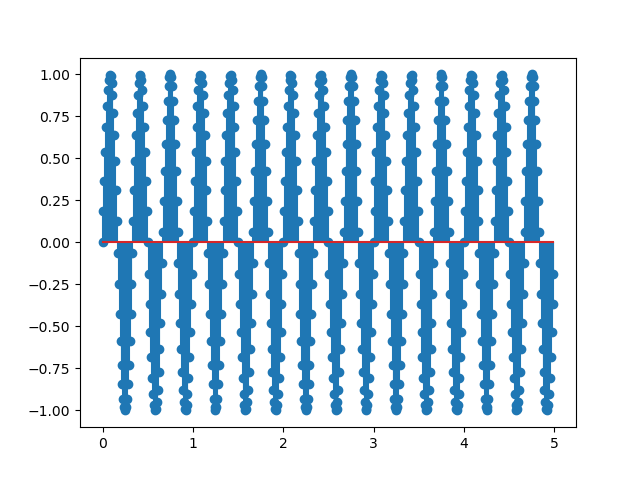

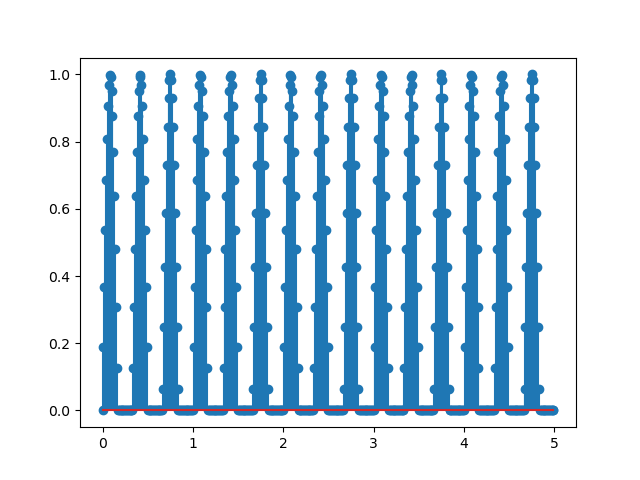

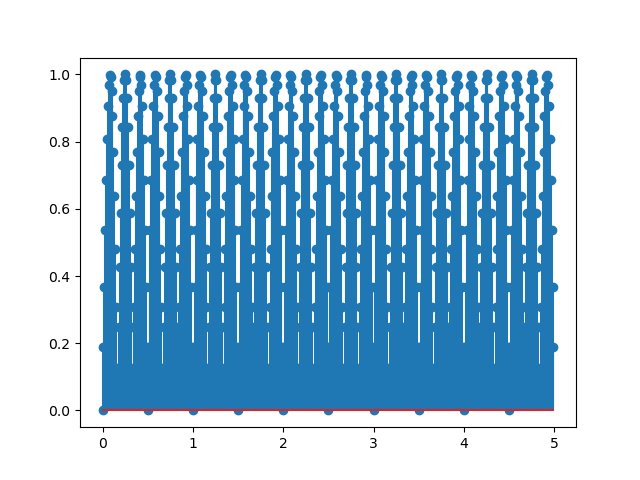

In [6]:
def rect_media_onda(y):
    idx_negativos = np.where(y<0)
    y_rect = y
    y_rect[idx_negativos] = 0
    return y_rect

def rect_onda_completa(y):
    idx_negativos = np.where(y<0)
    y[idx_negativos] = np.abs(y[idx_negativos])
    return y

plt.close('all')

sen, t = senoidal (100, 3, 0, 0, 5)
plot(t,sen)
x_2 = rect_media_onda(sen)
plot(t, x_2)

sen, t = senoidal (100, 3, 0, 0, 5)
x_3 = rect_onda_completa(sen)
plot(t, x_3)

3. cuantización en 8 niveles

$ p(t)= \left\{ \begin{array}{lcc}
             0 & \   \text{si}  & x < 0 \\
              H int(x/H) & \   \text{si}  & 0 \leq x < (N-1)H \\
             (N-1)H & \ \text{si} & z \geq (N-1)H 
             \end{array}
   \right.
$

donde N es el numero de niveles de la cuantizacion, y H es la magnitud del cuanto o paso. 

para la señal senoidal, que tiene parte negativa, el metodo debe adaptarse. Una forma sencilla de realizar esto es hacer la señal toda positiva (restando el minimo), aplicar la formula anterior, y luego sumar el minimo para volver a dejar la
señal en el rango de valores original


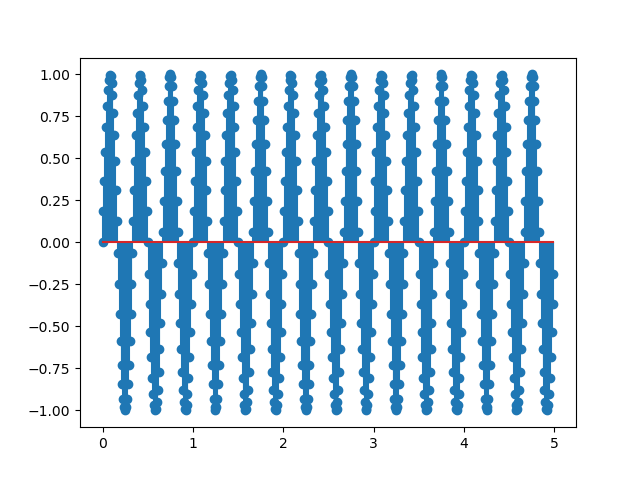

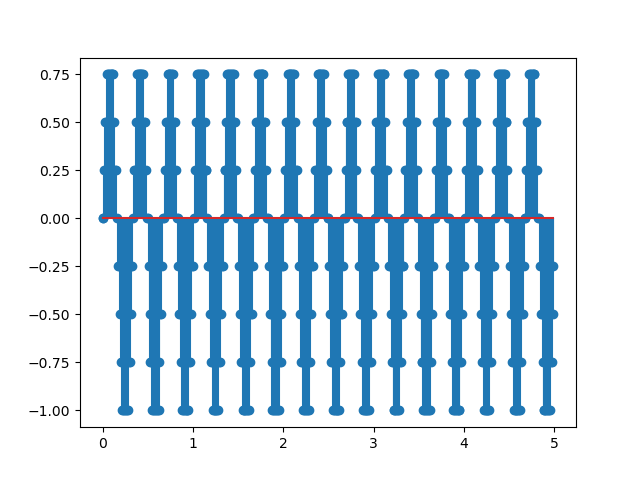

In [7]:
def cuantizacionN (y, N):
#n son los niveles de cuantizacion

    ynuevo=y-np.min(y)
    H=np.max(ynuevo)/N
    cuant=ynuevo

    #de acuerdo a qué valor de y me encuentre le asigno los distintos valores a cuant
    idx_menor_0 = np.where(ynuevo<0)
    idx_medio = np.where(np.logical_and(ynuevo>=0, ynuevo<(N-1)*H))
    idx_mayor = np.where(ynuevo>=(N-1)*H)

    cuant[idx_menor_0] = 0
    cuant[idx_medio] = H * np.fix(ynuevo[idx_medio]/H)
    cuant[idx_mayor] = (N-1) * H

    #sumo el minimo para volver a tener el rango original
    cuanti=cuant+min(y)
    return cuanti

sen, t = senoidal (100, 3, 0, 0, 5)
plot(t,sen)

sen_cuant = cuantizacionN(sen, 8)
plot(t,sen_cuant)


## Ejercicio 3
A partir del analisis de dicha grafica, determine los valores numericos (y unidades correspondientes) de amplitud (A), fase (phi), frecuencia (fs) y periodo de muestreo (Tm)

## Ejercicio 4

Genere y grafique una señal senoidal discreta con frecuencia 5 Hz y duracion 1 seg. Para ello utilice las siguientes frecuencias de muestreo: 100, 25, 10, 4, 1 y 0,5 Hz. Analice el resultado. ¿En que casos la cantidad de ciclos
que observa se corresponde con una sinusoidal de 5 Hz? ¿A que se deben las discrepancias encontradas?

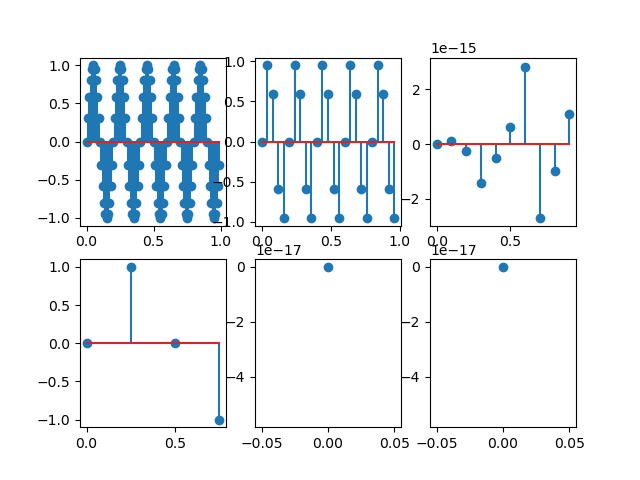

In [8]:
fig, axs = plt.subplots(2, 3)

sen1, t = senoidal (100, 5, 0, 0, 1)
axs[0, 0].stem(t,sen1)

sen2, t = senoidal (25, 5, 0, 0, 1)
axs[0, 1].stem(t,sen2)

sen3, t = senoidal (10, 5, 0, 0, 1)
axs[0, 2].stem(t,sen3)

sen4, t = senoidal (4, 5, 0, 0, 1)
axs[1, 0].stem(t,sen4)

sen5, t = senoidal (1, 5, 0, 0, 1)
axs[1, 1].stem(t,sen5)

sen6, t = senoidal (0.5, 5, 0, 0, 1)
axs[1, 2].stem(t,sen6)

plt.show()

Las discrepancias corresponden a los casos en que no se respeta la relación entre la frecuencia de muestreo y la frecuencia de la señal, y por consiguiente no se cuenta con la información necesaria para reconstruir la señal

## Ejercicio 5
Genere y grafique una se˜nal senoidal con frecuencia 4000 Hz y duracion 2 seg., utilizando una frecuencia de muestreo de 129 Hz. Grafique el resultado y estime la frecuencia de la onda sinusoidal que se observa en la
figura. Analice y obtenga conclusiones.

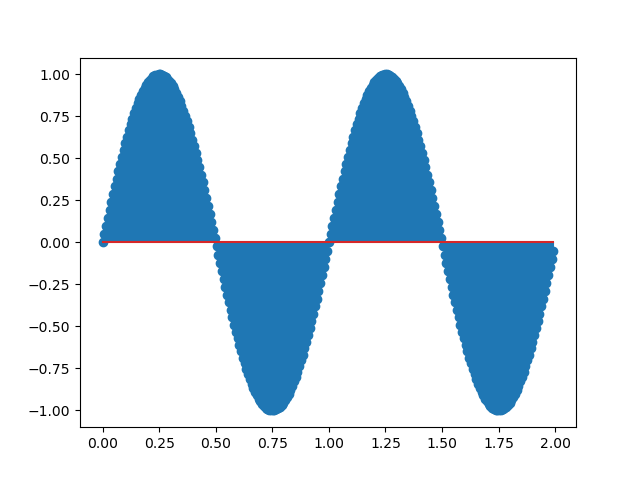

In [9]:
sen1, t = senoidal (129, 4000, 0, 0, 2)
plot(t,sen1)

Se observa una señal de frecuencia 1 Hz la cual no es de la frecuencia de la señal original. Esto se debe al fenómeno de alias, por el cual se observa que hay frecuencias que no existían en la señal original que ahora se observan dado que no se respeta el teorema del muestreo.

## Ejercicio 6
Genere una se˜nal discreta con frecuencia de muestreo de 10 Hz y sobremuestreela, mediante distintos tipos de interpoladores, a 4 veces la frecuencia de muestreo. Para esto, implemente la siguiente ecuacion de interpolacion:

$$
 x_i(m T_i) = \sum_{i=1}^{n} x (nT) I( \frac{mT_i }{T} - n)
$$


donde I es la funcion interpolante (la funcion sinc, por ejemplo). Observe que T representa el periodo de muestreo original y $T_i$ el nuevo periodo de muestreo. Note ademas que n y m indican el numero de muestra en la señal
original e interpolada, respectivamente y que, si bien aqui se expresan como señales analógicas, $x$ y $x_i$ serán señales discretas en su implementación (es decir, $x_i$[m] y $x[n]$ ). Para la funcion sinc tenga en cuenta la definición dada
en el primer ejercicio, con fs = 0,5.

n = numero de muestras viejo
m = numero de muestras nuevo

In [10]:
plt.close('all')

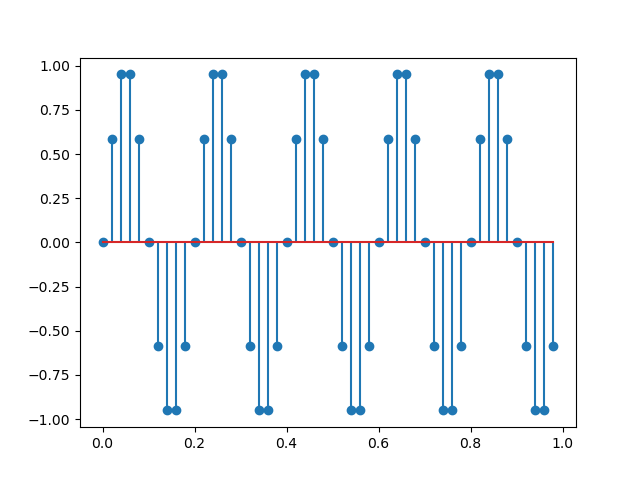

size vector t nuevo: 100
m: 100 - n: 50


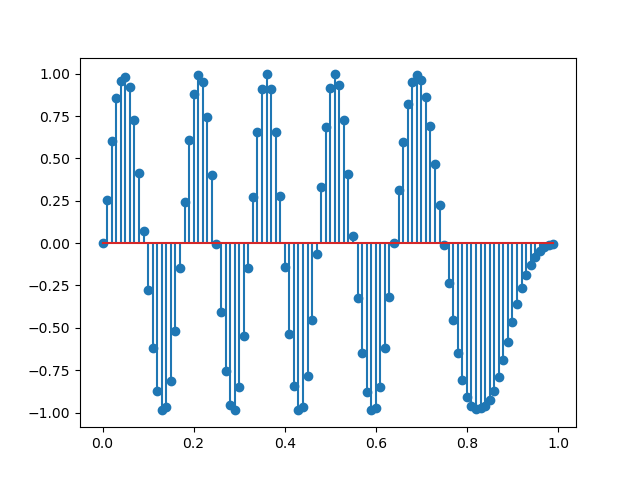

In [18]:
def interpolacion (t, xvieja, Tviejo, factor, fmvieja):
  fm_nueva = fmvieja*factor
  T_nuevo = 1 / fm_nueva

  tnuevo = np.arange(0,1,T_nuevo)
  print('size vector t nuevo:', len(tnuevo))
  [tsinc,y_sinc] = sinc(fm_nueva, 0.5, 0, -1, 1)

  m = len(tnuevo)
  n = len(xvieja)
  print('m:', m, '- n:', n)
  
  xnueva=np.zeros(m)

  for M in range(m):
    #cuando dice xvieja(n*t) tengo que considerar que en realidad es x(posicion para la que t=n*tnuevo)
    #esto es buscando el valor de t que sea igual a n*tnuevo
    suma = 0
    for N in range(n):
      t_aux = (tsinc[M] - t[N]) / Tviejo
      # if np.isclose(t_aux,0,1e-5):
      #   valor_sinc = 1
      # else:
      #     valor_sinc = math.sin(t_aux)/t_aux
      suma = suma + xvieja[N] * np.sinc(t_aux)
    # print('suma',M,':',suma)
    xnueva[M] = suma
    suma = 0
  return tnuevo, xnueva

plt.close('all')
sen1, t = senoidal (50, 5, 0, 0, 1)
plot(t, sen1)
t_int, x_int = interpolacion(t, sen1, 1/50, 2, 50)
plot(t_int, x_int)

## Ejercicio 7

Genere distintas realizaciones de una señal aleatoria con distribucion gaussiana (distribucion normal, equivalentemente) con media cero y varianza unitaria, y luego utilice dichas realizaciones para vericar la estacionariedad y la ergodicidad. Para esto tenga en cuenta que los estimadores
estadísticos (media y varianza, en este caso) requieren ininitas muestras y realizaciones para obtener el valor exacto, por lo tanto debería observarse si los estimadores tienden al mismo valor a medida que se incrementan la cantidad de muestras y realizaciones.

Ergodicidad: Un sistema es ergódico si su valor esperado (el promedio de muchos sistemas independientes realizando el experimento) es igual a su promedio a largo plazo (el promedio de un único sistema realizando el experimento repetidamente, manteniendo su estado de una muestra al siguiente)

ERGODICIDAD:
Media de 3000 experimentos con distinta cantidad de muestras: -0.00025839624293437995
Media de experimentos distintos del mismo sistema: -0.02838669016097624
Media de 3000 experimentos iguales repetidos: -0.0010793279561498548
ESTACIONARIEDAD: promedio de muestra 15 de todos los experimentos -0.006018923297274889 - promedio de muestra 25: -0.00992873114005746


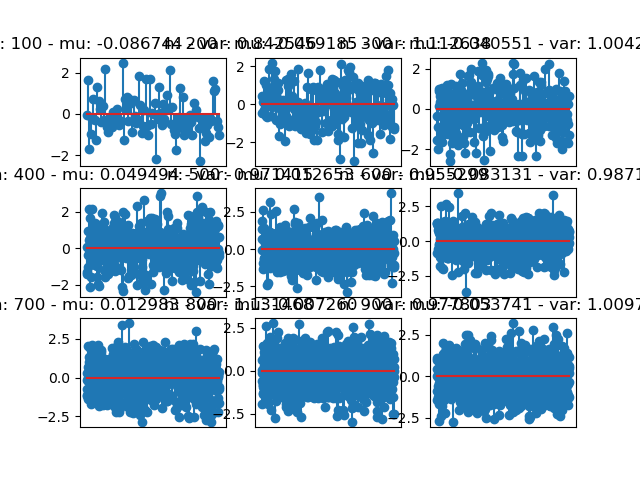

In [12]:
plt.close('all')

# Calculo la media
def media(x):
    return np.sum(x)/len(x)

def varianza(x):
  sum = 0
  m = media(x)
  for elemento in x:
    sum += (elemento - m) ** 2
  return sum / float(len(x))

# Genero una señal aleatoria de distribución normal
mu = 0 # Media
sigma = 1 # Varianza
n = 1500


# Prueba 1: incrementar la cantidad de muestras

muestras = 500
n_experimentos = 3000
suma_mu_experimentos = 0


for t in range(n_experimentos):
        x_gauss = np.random.normal(mu, sigma, 800)
        t_gauss = np.arange(0,1,1/muestras)
        prom = media(x_gauss)
        suma_mu_experimentos = suma_mu_experimentos + prom
        # print('muestras: ',muestras,'- media:',prom)
        muestras = muestras + 500

print('ERGODICIDAD:')
print('Media de %i experimentos con distinta cantidad de muestras:' %n_experimentos, suma_mu_experimentos/n_experimentos)

# GRAFICOS

fig, axs = plt.subplots(3, 3)
muestras = 100
n_experimentos = 9
suma_mu_experimentos = 0
for row in range(3):
    for col in range(3):
        x_gauss = np.random.normal(mu, sigma, muestras)
        t_gauss = np.arange(0,1,1/muestras)
        axs[row, col].stem(t_gauss,x_gauss)
        prom = media(x_gauss)
        axs[row, col].title.set_text('n: %i' %muestras + ' - mu: %1.6f' %prom + ' - var: %1.6f' %np.var(x_gauss))
        axs[row, col].axes.get_xaxis().set_visible(False)
        muestras = muestras + 100
        suma_mu_experimentos = suma_mu_experimentos + prom
print('Media de experimentos distintos del mismo sistema:', suma_mu_experimentos/n_experimentos)

# Prueba 2: Se realizan muchas repeticiones con la misma cantidad de muestras

muestras = 500
n_experimentos = 3000
suma_mu_experimentos = 0
suma_senial_en_t_15 = 0
suma_senial_en_t_25 = 0 

for t in range(n_experimentos):
        x_gauss = np.random.normal(mu, sigma, 800)
        t_gauss = np.arange(0,1,1/muestras)
        prom = media(x_gauss)
        suma_mu_experimentos = suma_mu_experimentos + prom
        suma_senial_en_t_15 = suma_senial_en_t_15 + x_gauss[15]
        suma_senial_en_t_25 = suma_senial_en_t_25 + x_gauss[25]
print('Media de %i experimentos iguales repetidos:' %n_experimentos, suma_mu_experimentos/n_experimentos)
print('ESTACIONARIEDAD: promedio de muestra 15 de todos los experimentos',suma_senial_en_t_15/n_experimentos,'- promedio de muestra 25:', suma_senial_en_t_25/n_experimentos)

# GRAFICOS

# fig, axs = plt.subplots(3, 3)
# for row in range(3):
#     for col in range(3):
#         x_gauss = np.random.normal(mu, sigma, muestras)
#         t_gauss = np.arange(0,1,1/muestras)
#         axs[row, col].stem(t_gauss,x_gauss)
#         prom = media(x_gauss)
#         axs[row, col].title.set_text('n: %i' %muestras + ' - mu: %1.6f' %prom + ' - var: %1.6f' %np.var(x_gauss))
#         axs[row, col].axes.get_xaxis().set_visible(False)
#         suma_mu_experimentos = suma_mu_experimentos + prom

# print('Media de experimentos iguales repetidos:', suma_mu_experimentos/n_experimentos)




## Ejercicio 8
Genere una señal de ruido aleatorio, sumelo a una señal conocida y grafique el resultado. Calcule la potencia de la señal original, la potencia del
ruido generado, y calcule la relación señal-ruido (SNR, del ingles signal-tonoise-ratio). Luego multiplique la señal de ruido por una constante y vuelva a calcular la SNR. Por ultimo, a partir de las deficiones de potencia y SNR despeje y calcule el valor para dicha constante de manera que la SNR resultante sea de 0 dB.

Energía de una señal

$$ E_{tot} = \sum_{n = n_1}^{n_2} |x[n]|^2 $$

Potencia de una señal 
$$ P_{prom} = \frac{E_{tot}}{n_2 - n_1 +1} $$

Relacion Señal Ruido SNR

$$SNR = \frac{P_{señal}} {P_{ruido}} $$

Potencia de una señal multiplicada por una constante

$$ P_{prom} = \frac{E_{tot}}{n_2 - n_1 +1} \\

 = \frac{\sum_{n = n_1}^{n_2} |x[n]|^2}{n_2 - n_1 +1} $$

multiplico la señal por una constante c
$$  = \frac{\sum_{n = n_1}^{n_2} |C x[n]|^2}{n_2 - n_1 +1} 
= \frac{\sum_{n = n_1}^{n_2} C^2 | x[n]|^2}{n_2 - n_1 +1}
= \frac{C^2 \sum_{n = n_1}^{n_2} |x[n]|^2}{n_2 - n_1 +1}\\
$$

Es decir que la potencia promedio se convierte en
$$ P_{prom} = C^2 \frac{E_{tot}}{n_2 - n_1 +1} $$

Y la SNR para un ruido multiplicado por una constante entonces es
$$SNR = \frac{ P_{señal}} {C^2 P_{ruido}} $$

Para que la SNR sea 0, el denominador debe tender a infinito, por lo cual mientras más grande sea la constante, más cercana a 0 será la SNR, y la señal original será cada vez menos reconocible


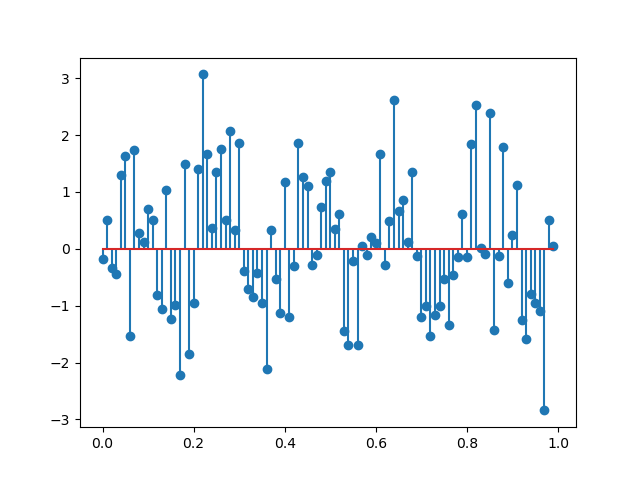

potencia de senoidal: 0.5000000000000002
potencia del ruido: 0.9821401181913649
Relacion señal ruido: 0.509092328822452
potencia del ruido multiplicado por constante: 3409.3346733446724
Relacion señal ruido al multiplicar por una constante: 0.00014665618013660225


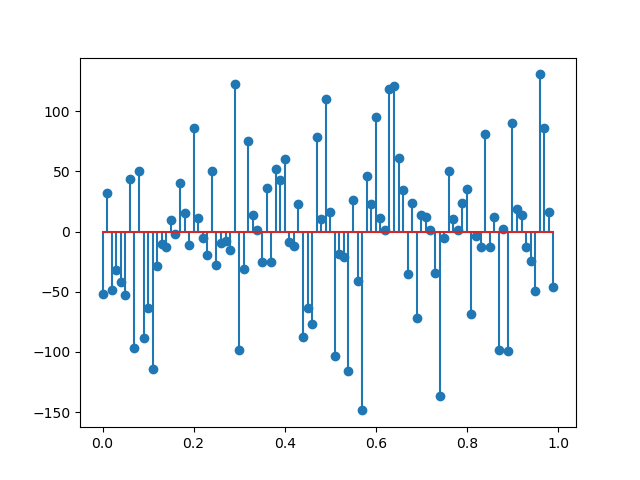

In [13]:
# Energía total de una señal
def energia(x):
    return sum(np.abs(x) ** 2)

def potencia(x):
    return energia(x)/len(x)

def SNR(pot_senial, pot_ruido):
    return pot_senial/pot_ruido

ruido = np.random.normal(mu, sigma, 100)
sen, t = senoidal (100, 5, 0, 0, 1)

suma = ruido + sen

plot(t,suma)
pot_senial = potencia(sen); pot_ruido = potencia(ruido); SNR_1 = SNR(pot_senial, pot_ruido)
print('potencia de senoidal:', pot_senial)
print('potencia del ruido:', pot_ruido)
print('Relacion señal ruido:', SNR_1)

# Multiplico el ruido por una constante y vuelvo a calcular SNR

ruido_x_constante = 60*np.random.normal(mu, sigma, 100)
pot_ruido_x_constante = potencia(ruido_x_constante); SNR_2 = SNR(pot_senial, pot_ruido_x_constante)
print('potencia del ruido multiplicado por constante:', pot_ruido_x_constante)
print('Relacion señal ruido al multiplicar por una constante:', SNR_2)

suma_2 = ruido_x_constante + sen
plot(t,suma_2)